In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [208]:
gr = pd.read_csv('./data/gregory_river_1993_2013.csv')
br = pd.read_csv('./data/burnett_river_1993_2013.csv')
gr_copy = gr.copy()
br_copy = br.copy()

In [209]:
gr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 37 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   LOCATION_ID_BSA                                                1775 non-null   float64
 1   LOCATION_NAME                                                  1775 non-null   object 
 2   Lat_GDA94                                                      1775 non-null   float64
 3   Long_GDA04                                                     1775 non-null   float64
 4   SURVEY_DATE                                                    1775 non-null   object 
 5   Time_HHMMSS                                                    1775 non-null   int64  
 6   Depth_m                                                        1775 non-null   float64
 7   Data qualifier for Chlorophyll-a (ug/L)                     

In [210]:
gr.describe()

,LOCATION_ID_BSA,Lat_GDA94,Long_GDA04,Time_HHMMSS,Depth_m,Chlorophyll-a (ug/L),Secchi depth (metres),Ammonia as N (mg/L),Nitrogen Oxides as N (mg/L),Total Nitrogen as N (mg/L),...,Data qualifier for Total Phosphorus as P (mg/L),Total Phosphorus as P (mg/L),Data qualifier for Salinity (PSU),Salinity (PSU),Data qualifier for Specific Conductance at 25 deg C (mS/cm),Specific Conductance at 25 deg C (mS/cm),Data qualifier for Temperature (deg C),Temperature (deg C),Data qualifier for Turbidity (NTU),Turbidity (NTU)
count,1.775000e+03,1775.000000,1775.000000,1775.000000,1775.000000,497.000000,508.000000,229.000000,229.000000,229.000000,...,0.0,229.000000,0.0,1614.000000,0.0,1614.000000,0.0,1619.00000,0.0,1619.000000
mean,1.370000e+12,-25.154504,152.513209,103357.690141,2.035437,6.536016,0.869390,0.018013,0.028843,0.360266,...,NaN,0.023017,NaN,24.569734,NaN,37.974455,NaN,23.37992,NaN,23.001791
std,0.000000e+00,0.006664,0.011030,17223.878847,1.702691,6.776609,0.532969,0.024337,0.039849,0.299640,...,NaN,0.024327,NaN,11.625704,NaN,17.184133,NaN,3.71963,NaN,27.888114
min,1.370000e+12,-25.168210,152.501111,71000.000000,0.200000,0.100000,0.100000,0.002000,0.002000,0.037000,...,NaN,0.004000,NaN,0.047000,NaN,0.095000,NaN,13.99000,NaN,0.000000
25%,1.370000e+12,-25.157778,152.501111,91600.000000,0.200000,2.100000,0.500000,0.004000,0.003000,0.180000,...,NaN,0.011000,NaN,17.500000,NaN,28.400000,NaN,20.10500,NaN,8.000000
50%,1.370000e+12,-25.157778,152.518611,102100.000000,2.000000,3.900000,0.775000,0.008000,0.011000,0.230000,...,NaN,0.015000,NaN,28.050000,NaN,43.500000,NaN,24.00000,NaN,13.000000
75%,1.370000e+12,-25.148333,152.518611,112600.000000,4.000000,9.000000,1.100000,0.021000,0.040000,0.420000,...,NaN,0.025000,NaN,33.900000,NaN,51.600000,NaN,26.22000,NaN,25.000000
max,1.370000e+12,-25.148333,152.533500,161500.000000,6.000000,47.100000,3.000000,0.140000,0.180000,1.600000,...,NaN,0.230000,NaN,41.500000,NaN,61.300000,NaN,31.52000,NaN,281.000000


In [211]:
print(gr['Lat_GDA94'].unique(),gr['Long_GDA04'].unique())

[-25.16821  -25.148333 -25.157778] [152.5335   152.518611 152.501111]


In [212]:
gr.insert(0,'Location',1)

In [213]:
gr = gr.drop(['LOCATION_ID_BSA','LOCATION_NAME'],axis = 1)

In [214]:
gr.loc[gr['Lat_GDA94'] == -25.16821,['Location']] = '1'
gr.loc[gr['Lat_GDA94'] == -25.148333,['Location']] = '2'
gr.loc[gr['Lat_GDA94'] == -25.157778,['Location']] = '3'

In [215]:
print(gr['Data qualifier for Chlorophyll-a (ug/L)'].unique())
print(gr['Data qualifier for Dissolved Oxygen concentration (mg/L)'].unique())
print(gr['Data qualifier for Dissolved Oxygen % saturation (%)'].unique())
print(gr['Data qualifier for pH (Unit)'].unique())
print(gr['Data qualifier for Salinity (PSU)'].unique())
print(gr['Data qualifier for Specific Conductance at 25 deg C (mS/cm)'].unique())
print(gr['Data qualifier for Temperature (deg C)'].unique())
print(gr['Data qualifier for Turbidity (NTU)'].unique())

[nan '<']
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]


In [216]:
gr.loc[gr['Data qualifier for Chlorophyll-a (ug/L)'] == '<']

,Location,Lat_GDA94,Long_GDA04,SURVEY_DATE,Time_HHMMSS,Depth_m,Data qualifier for Chlorophyll-a (ug/L),Chlorophyll-a (ug/L),Data qualifier for Secchi depth (metres),Secchi depth (metres),...,Data qualifier for Total Phosphorus as P (mg/L),Total Phosphorus as P (mg/L),Data qualifier for Salinity (PSU),Salinity (PSU),Data qualifier for Specific Conductance at 25 deg C (mS/cm),Specific Conductance at 25 deg C (mS/cm),Data qualifier for Temperature (deg C),Temperature (deg C),Data qualifier for Turbidity (NTU),Turbidity (NTU)
1052,3,-25.157778,152.501111,24/03/1994,161500,0.2,<,0.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1676,3,-25.157778,152.501111,23/03/2011,122500,0.2,<,0.1,NaN,0.1,...,NaN,NaN,NaN,0.047,NaN,0.095,NaN,25.77,NaN,135.0
1709,3,-25.157778,152.501111,29/03/2012,130600,0.2,<,0.1,NaN,0.2,...,NaN,NaN,NaN,0.131,NaN,0.261,NaN,24.04,NaN,101.3


In [217]:
gr.loc[gr['Chlorophyll-a (ug/L)'] == 0.1]

,Location,Lat_GDA94,Long_GDA04,SURVEY_DATE,Time_HHMMSS,Depth_m,Data qualifier for Chlorophyll-a (ug/L),Chlorophyll-a (ug/L),Data qualifier for Secchi depth (metres),Secchi depth (metres),...,Data qualifier for Total Phosphorus as P (mg/L),Total Phosphorus as P (mg/L),Data qualifier for Salinity (PSU),Salinity (PSU),Data qualifier for Specific Conductance at 25 deg C (mS/cm),Specific Conductance at 25 deg C (mS/cm),Data qualifier for Temperature (deg C),Temperature (deg C),Data qualifier for Turbidity (NTU),Turbidity (NTU)
54,1,-25.168210,152.533500,25/06/2009,111700,0.2,NaN,0.1,NaN,2.05,...,NaN,NaN,NaN,30.600,NaN,47.000,NaN,19.68,NaN,3.0
1676,3,-25.157778,152.501111,23/03/2011,122500,0.2,<,0.1,NaN,0.10,...,NaN,NaN,NaN,0.047,NaN,0.095,NaN,25.77,NaN,135.0
1709,3,-25.157778,152.501111,29/03/2012,130600,0.2,<,0.1,NaN,0.20,...,NaN,NaN,NaN,0.131,NaN,0.261,NaN,24.04,NaN,101.3


In [218]:
gr = gr.drop(['Lat_GDA94','Long_GDA04','Secchi depth (metres)','Data qualifier for Secchi depth (metres)'],axis = 1)
gr = gr.drop(['Data qualifier for Ammonia as N (mg/L)','Ammonia as N (mg/L)',],axis = 1)
gr = gr.drop(['Data qualifier for Nitrogen Oxides as N (mg/L)','Nitrogen Oxides as N (mg/L)'],axis = 1)
gr = gr.drop(['Data qualifier for Total Nitrogen as N (mg/L)','Total Nitrogen as N (mg/L)'],axis = 1)
gr = gr.drop(['Data qualifier for Organic Nitrogen as N (mg/L)','Organic Nitrogen as N (mg/L)'],axis = 1)
gr = gr.drop(['Data qualifier for Total Phosphorus as P (mg/L)','Total Phosphorus as P (mg/L)'],axis = 1)
gr = gr.drop(['Data qualifier for Filterable Reactive Phosphorus as P (mg/L)','Filterable Reactive Phosphorus as P (mg/L)'],axis = 1)
gr = gr.drop(['Data qualifier for Dissolved Oxygen concentration (mg/L)','Data qualifier for Dissolved Oxygen % saturation (%)',
              'Data qualifier for pH (Unit)','Data qualifier for Salinity (PSU)','Data qualifier for Specific Conductance at 25 deg C (mS/cm)',
             'Data qualifier for Temperature (deg C)','Data qualifier for Turbidity (NTU)'],axis = 1)

In [219]:
gr = gr.drop(1052,axis=0)

In [220]:
gr = gr.drop(['Data qualifier for Chlorophyll-a (ug/L)'],axis = 1)

In [221]:
gr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1774 entries, 0 to 1774
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Location                                  1774 non-null   object 
 1   SURVEY_DATE                               1774 non-null   object 
 2   Time_HHMMSS                               1774 non-null   int64  
 3   Depth_m                                   1774 non-null   float64
 4   Chlorophyll-a (ug/L)                      496 non-null    float64
 5   Dissolved Oxygen concentration (mg/L)     1602 non-null   float64
 6   Dissolved Oxygen % saturation (%)         1602 non-null   float64
 7   pH (Unit)                                 1619 non-null   float64
 8   Salinity (PSU)                            1614 non-null   float64
 9   Specific Conductance at 25 deg C (mS/cm)  1614 non-null   float64
 10  Temperature (deg C)                      

In [222]:
gr.dropna(axis=0,subset=['Dissolved Oxygen concentration (mg/L)','Dissolved Oxygen % saturation (%)',
                        'pH (Unit)','Salinity (PSU)', 'Specific Conductance at 25 deg C (mS/cm)',
                         'Temperature (deg C)','Turbidity (NTU)'],inplace=True)

In [223]:
gr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1602 entries, 0 to 1774
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Location                                  1602 non-null   object 
 1   SURVEY_DATE                               1602 non-null   object 
 2   Time_HHMMSS                               1602 non-null   int64  
 3   Depth_m                                   1602 non-null   float64
 4   Chlorophyll-a (ug/L)                      346 non-null    float64
 5   Dissolved Oxygen concentration (mg/L)     1602 non-null   float64
 6   Dissolved Oxygen % saturation (%)         1602 non-null   float64
 7   pH (Unit)                                 1602 non-null   float64
 8   Salinity (PSU)                            1602 non-null   float64
 9   Specific Conductance at 25 deg C (mS/cm)  1602 non-null   float64
 10  Temperature (deg C)                      

In [224]:
gr.describe()

,Time_HHMMSS,Depth_m,Chlorophyll-a (ug/L),Dissolved Oxygen concentration (mg/L),Dissolved Oxygen % saturation (%),pH (Unit),Salinity (PSU),Specific Conductance at 25 deg C (mS/cm),Temperature (deg C),Turbidity (NTU)
count,1602.000000,1602.000000,346.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000,1602.000000
mean,103744.007491,2.215668,6.270231,6.039388,81.212921,7.598077,24.574020,37.979695,23.385699,23.146629
std,17463.817998,1.682280,6.787709,1.073590,12.326349,0.390924,11.626658,17.189441,3.701255,27.995650
min,71000.000000,0.200000,0.100000,0.200000,3.300000,5.910000,0.047000,0.095000,13.990000,0.000000
25%,91625.000000,0.200000,1.900000,5.400000,75.100000,7.490000,17.525000,28.425000,20.145000,8.000000
50%,102400.000000,2.000000,3.600000,6.000000,82.900000,7.700000,28.050000,43.500000,24.010000,13.000000
75%,113100.000000,4.000000,8.100000,6.700000,88.200000,7.840000,33.800000,51.500000,26.200000,25.000000
max,161200.000000,6.000000,40.200000,11.900000,150.500000,8.410000,41.500000,61.300000,31.520000,281.000000


In [225]:
gr

,Location,SURVEY_DATE,Time_HHMMSS,Depth_m,Chlorophyll-a (ug/L),Dissolved Oxygen concentration (mg/L),Dissolved Oxygen % saturation (%),pH (Unit),Salinity (PSU),Specific Conductance at 25 deg C (mS/cm),Temperature (deg C),Turbidity (NTU)
0,1,27/08/2007,100900,0.2,1.6,7.0,89.6,7.79,26.8,41.8,19.81,2.0
1,1,27/08/2007,100900,2.0,NaN,6.9,89.2,7.78,26.9,42.0,19.77,3.0
2,1,27/08/2007,100900,3.0,NaN,7.0,89.3,7.78,27.0,42.0,19.75,2.0
3,1,28/09/2007,93600,0.2,1.2,6.3,87.3,7.78,28.0,43.4,23.33,4.0
4,1,28/09/2007,93600,2.0,NaN,6.3,87.2,7.78,28.0,43.4,23.33,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1770,3,20/11/2013,105400,2.0,NaN,5.5,81.4,7.64,29.1,45.0,27.21,12.1
1771,3,20/11/2013,105400,4.0,NaN,5.2,77.1,7.65,29.7,45.8,27.11,17.4
1772,3,17/12/2013,94900,0.2,7.2,4.9,75.9,7.71,33.8,51.5,28.29,15.4
1773,3,17/12/2013,94900,2.0,NaN,4.8,74.4,7.70,33.9,51.6,28.20,20.9


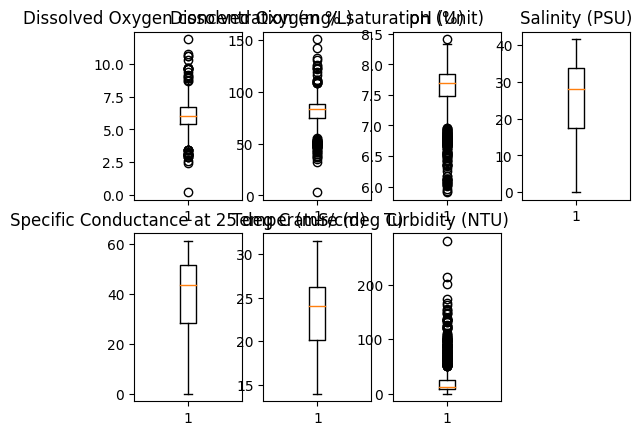

In [226]:
nfeat = 8
ncol = 4
nrow = int(np.ceil(nfeat/ncol))
for n in range(5,12):
    plt.subplot(nrow,ncol,n-4)
    plt.boxplot(gr.iloc[:,n])
    plt.title(gr.columns[n])
plt.show()

In [227]:
gr.to_csv('./data/gr.csv')

In [228]:
br

,LOCATION_ID_BSA,LOCATION_NAME,Lat_GDA94,Long_GDA04,SURVEY_DATE,Time_HHMMSS,Depth_m,Data qualifier for Chlorophyll-a (ug/L),Chlorophyll-a (ug/L),Data qualifier for Secchi depth (metres),...,Data qualifier for Total Phosphorus as P (mg/L),Total Phosphorus as P (mg/L),Data qualifier for Salinity (PSU),Salinity (PSU),Data qualifier for Specific Conductance at 25 deg C (mS/cm),Specific Conductance at 25 deg C (mS/cm),Data qualifier for Temperature (deg C),Temperature (deg C),Data qualifier for Turbidity (NTU),Turbidity (NTU)
0,1.360000e+12,BURNETT RIVER 0.0km AT MOUTH,-24.754167,152.408889,18/05/1993,140800,0.2,NaN,NaN,NaN,...,NaN,NaN,NaN,36.800,NaN,55.50,NaN,21.90,NaN,NaN
1,1.360000e+12,BURNETT RIVER 0.0km AT MOUTH,-24.754167,152.408889,18/05/1993,140800,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,36.800,NaN,55.50,NaN,21.90,NaN,NaN
2,1.360000e+12,BURNETT RIVER 0.0km AT MOUTH,-24.754167,152.408889,18/05/1993,140800,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,36.800,NaN,55.50,NaN,21.90,NaN,NaN
3,1.360000e+12,BURNETT RIVER 0.0km AT MOUTH,-24.754167,152.408889,16/06/1993,123400,0.2,NaN,NaN,NaN,...,NaN,NaN,NaN,43.700,NaN,63.90,NaN,18.70,NaN,NaN
4,1.360000e+12,BURNETT RIVER 0.0km AT MOUTH,-24.754167,152.408889,16/06/1993,123400,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,42.500,NaN,62.40,NaN,18.60,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8721,1.360000e+12,BURNETT RIVER 23.5km FROM MOUTH AT SPLITTERS C...,-24.870278,152.294722,16/09/2013,130100,0.2,NaN,1.9,>,...,NaN,0.051,NaN,23.600,NaN,37.20,NaN,25.23,NaN,2.0
8722,1.360000e+12,BURNETT RIVER 23.5km FROM MOUTH AT SPLITTERS C...,-24.870278,152.294722,15/10/2013,85000,0.2,NaN,0.3,>,...,NaN,0.067,NaN,26.300,NaN,41.00,NaN,24.23,NaN,8.4
8723,1.360000e+12,BURNETT RIVER 23.5km FROM MOUTH AT SPLITTERS C...,-24.870278,152.294722,21/11/2013,134400,0.2,NaN,5.0,NaN,...,NaN,0.042,NaN,0.740,NaN,1.45,NaN,28.35,NaN,7.1
8724,1.360000e+12,BURNETT RIVER 23.5km FROM MOUTH AT SPLITTERS C...,-24.870278,152.294722,21/11/2013,134400,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,0.905,NaN,1.76,NaN,28.35,NaN,12.3


In [229]:
print(br['Lat_GDA94'].unique(),br['Long_GDA04'].unique())

[-24.75416667 -24.77166667 -24.78527778 -24.79944444 -24.80861111
 -24.84638889 -24.86188    -24.8647     -24.86361111 -24.87027778] [152.4088889 152.3802778 152.3830556 152.3780556 152.3588889 152.3686111
 152.35625   152.34343   152.3252778 152.2947222]


In [230]:
br.insert(0,'Location',1)

In [231]:
br = br.drop(['LOCATION_ID_BSA','LOCATION_NAME'],axis = 1)

In [232]:
br.loc[br['Lat_GDA94'] == -24.77166667,['Location']] = '2'
br.loc[br['Lat_GDA94'] == -24.78527778,['Location']] = '3'
br.loc[br['Lat_GDA94'] == -24.79944444,['Location']] = '4'
br.loc[br['Lat_GDA94'] == -24.80861111,['Location']] = '5'
br.loc[br['Lat_GDA94'] == -24.84638889,['Location']] = '6'
br.loc[br['Lat_GDA94'] == -24.86188,['Location']] = '7'
br.loc[br['Lat_GDA94'] == -24.8647,['Location']] = '8'
br.loc[br['Lat_GDA94'] == -24.86361111,['Location']] = '9'
br.loc[br['Lat_GDA94'] == -24.87027778,['Location']] = '10'

In [233]:
print(br['Data qualifier for Chlorophyll-a (ug/L)'].unique())
print(br['Data qualifier for Dissolved Oxygen concentration (mg/L)'].unique())
print(br['Data qualifier for Dissolved Oxygen % saturation (%)'].unique())
print(br['Data qualifier for pH (Unit)'].unique())
print(br['Data qualifier for Salinity (PSU)'].unique())
print(br['Data qualifier for Specific Conductance at 25 deg C (mS/cm)'].unique())
print(br['Data qualifier for Temperature (deg C)'].unique())
print(br['Data qualifier for Turbidity (NTU)'].unique())

[nan '<']
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]


In [234]:
br = br.drop(['Lat_GDA94','Long_GDA04','Secchi depth (metres)','Data qualifier for Secchi depth (metres)'],axis = 1)
br = br.drop(['Data qualifier for Ammonia as N (mg/L)','Ammonia as N (mg/L)',],axis = 1)
br = br.drop(['Data qualifier for Nitrogen Oxides as N (mg/L)','Nitrogen Oxides as N (mg/L)'],axis = 1)
br = br.drop(['Data qualifier for Total Nitrogen as N (mg/L)','Total Nitrogen as N (mg/L)'],axis = 1)
br = br.drop(['Data qualifier for Organic Nitrogen as N (mg/L)','Organic Nitrogen as N (mg/L)'],axis = 1)
br = br.drop(['Data qualifier for Total Phosphorus as P (mg/L)','Total Phosphorus as P (mg/L)'],axis = 1)
br = br.drop(['Data qualifier for Filterable Reactive Phosphorus as P (mg/L)','Filterable Reactive Phosphorus as P (mg/L)'],axis = 1)
br = br.drop(['Data qualifier for Dissolved Oxygen concentration (mg/L)','Data qualifier for Dissolved Oxygen % saturation (%)',
              'Data qualifier for pH (Unit)','Data qualifier for Salinity (PSU)','Data qualifier for Specific Conductance at 25 deg C (mS/cm)',
             'Data qualifier for Temperature (deg C)','Data qualifier for Turbidity (NTU)'],axis = 1)

In [235]:
br.loc[br['Data qualifier for Chlorophyll-a (ug/L)'] == '<']

,Location,SURVEY_DATE,Time_HHMMSS,Depth_m,Data qualifier for Chlorophyll-a (ug/L),Chlorophyll-a (ug/L),Dissolved Oxygen concentration (mg/L),Dissolved Oxygen % saturation (%),pH (Unit),Salinity (PSU),Specific Conductance at 25 deg C (mS/cm),Temperature (deg C),Turbidity (NTU)
1243,2,15/07/1993,102000,0.2,<,0.5,5.8,81.1,7.80,39.3,58.6,20.10,NaN
6826,8,15/07/1993,124000,0.2,<,0.5,4.8,65.5,7.60,32.1,49.2,21.10,NaN
7051,8,23/06/1998,124000,0.2,<,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7098,8,25/06/1999,130000,0.2,<,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7203,8,29/05/2002,130500,0.2,<,0.1,8.9,117.1,8.06,30.6,47.1,20.00,8.5
7448,8,17/11/2009,123600,0.2,<,0.1,7.4,110.4,7.92,28.9,44.7,27.87,11.0
8634,10,17/11/2009,130700,0.2,<,0.1,8.0,117.6,7.86,25.5,39.9,27.79,22.0


In [236]:
br.dropna(axis=0,subset=['Dissolved Oxygen concentration (mg/L)','Dissolved Oxygen % saturation (%)',
                        'pH (Unit)','Salinity (PSU)', 'Specific Conductance at 25 deg C (mS/cm)',
                         'Temperature (deg C)','Turbidity (NTU)'],inplace=True)

In [237]:
br = br.drop(['Data qualifier for Chlorophyll-a (ug/L)'],axis = 1)

In [238]:
br.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7829 entries, 14 to 8725
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Location                                  7829 non-null   object 
 1   SURVEY_DATE                               7829 non-null   object 
 2   Time_HHMMSS                               7829 non-null   int64  
 3   Depth_m                                   7829 non-null   float64
 4   Chlorophyll-a (ug/L)                      1002 non-null   float64
 5   Dissolved Oxygen concentration (mg/L)     7829 non-null   float64
 6   Dissolved Oxygen % saturation (%)         7829 non-null   float64
 7   pH (Unit)                                 7829 non-null   float64
 8   Salinity (PSU)                            7829 non-null   float64
 9   Specific Conductance at 25 deg C (mS/cm)  7829 non-null   float64
 10  Temperature (deg C)                     

In [239]:
br.describe()

,Time_HHMMSS,Depth_m,Chlorophyll-a (ug/L),Dissolved Oxygen concentration (mg/L),Dissolved Oxygen % saturation (%),pH (Unit),Salinity (PSU),Specific Conductance at 25 deg C (mS/cm),Temperature (deg C),Turbidity (NTU)
count,7829.000000,7829.000000,1002.000000,7829.000000,7829.000000,7829.000000,7829.000000,7829.000000,7829.000000,7829.000000
mean,116952.918636,3.050543,4.289421,6.636173,92.490740,7.931893,28.350672,43.562009,23.977281,16.405288
std,20046.587047,2.763742,5.126044,0.883737,11.624124,0.265320,9.184170,13.483386,3.572416,31.346252
min,65200.000000,0.200000,0.100000,3.900000,52.100000,6.850000,0.112000,0.224000,14.500000,0.000000
25%,102800.000000,0.200000,1.400000,6.100000,86.000000,7.770000,25.600000,40.000000,20.880000,5.000000
50%,114700.000000,2.000000,2.700000,6.600000,93.100000,7.960000,31.500000,48.200000,24.600000,8.500000
75%,131400.000000,4.000000,5.300000,7.200000,98.800000,8.130000,35.000000,53.000000,26.940000,16.000000
max,181600.000000,14.000000,93.000000,11.100000,162.300000,8.740000,39.700000,59.100000,32.100000,838.000000


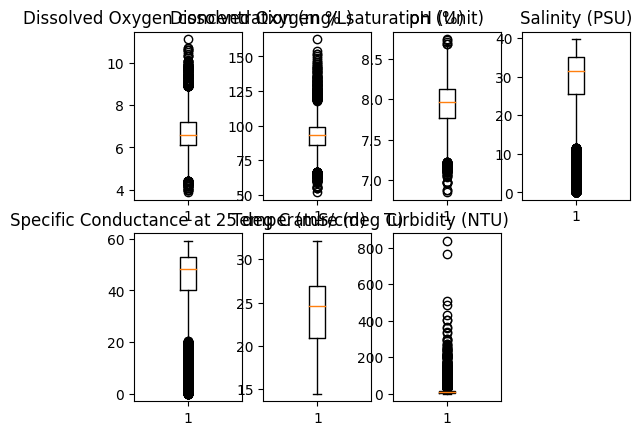

In [240]:
for n in range(5,12):
    plt.subplot(nrow,ncol,n-4)
    plt.boxplot(br.iloc[:,n])
    plt.title(br.columns[n])
plt.show()

In [241]:
br.to_csv('./data/br.csv')

In [242]:
gr['SURVEY_DATE'] = pd.to_datetime(gr['SURVEY_DATE'], dayfirst=True)
gr = gr.sort_values('SURVEY_DATE')
gr

,Location,SURVEY_DATE,Time_HHMMSS,Depth_m,Chlorophyll-a (ug/L),Dissolved Oxygen concentration (mg/L),Dissolved Oxygen % saturation (%),pH (Unit),Salinity (PSU),Specific Conductance at 25 deg C (mS/cm),Temperature (deg C),Turbidity (NTU)
209,2,1994-03-24,154500,2.0,NaN,4.7,56.7,7.00,1.790,3.41,24.30,61.0
207,2,1994-03-24,154500,0.2,NaN,5.1,62.4,7.10,1.200,2.32,25.20,66.0
210,2,1994-03-24,154500,3.5,NaN,5.6,69.6,7.60,9.740,16.60,23.40,14.0
1051,3,1994-03-24,161200,0.2,NaN,6.1,73.7,6.90,0.246,0.49,24.80,62.0
1053,3,1994-03-24,161200,2.0,NaN,6.0,72.3,6.80,0.256,0.51,24.70,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...
206,1,2013-12-17,92900,4.0,NaN,5.9,90.4,8.03,37.500,56.40,26.68,11.3
1773,3,2013-12-17,94900,2.0,NaN,4.8,74.4,7.70,33.900,51.60,28.20,20.9
1048,2,2013-12-17,93800,0.2,2.2,5.7,87.3,7.90,37.000,55.70,26.62,8.1
1050,2,2013-12-17,93800,3.5,NaN,5.6,85.1,7.90,37.100,55.80,26.42,21.1


In [243]:
br['SURVEY_DATE'] = pd.to_datetime(br['SURVEY_DATE'], dayfirst=True)
br = br.sort_values('SURVEY_DATE')
br

,Location,SURVEY_DATE,Time_HHMMSS,Depth_m,Chlorophyll-a (ug/L),Dissolved Oxygen concentration (mg/L),Dissolved Oxygen % saturation (%),pH (Unit),Salinity (PSU),Specific Conductance at 25 deg C (mS/cm),Temperature (deg C),Turbidity (NTU)
14,1,1993-08-12,90700,0.2,NaN,6.7,89.9,8.42,36.0,54.3,19.00,8.0
5243,6,1993-08-12,101800,3.0,NaN,4.7,62.2,8.01,31.4,48.2,20.00,4.0
8260,10,1993-08-12,112400,1.0,NaN,7.6,96.8,8.20,27.6,42.9,18.80,8.0
8259,10,1993-08-12,112400,0.2,NaN,7.6,96.6,8.19,27.5,42.8,18.90,7.0
3372,4,1993-08-12,94900,3.0,NaN,6.8,89.4,8.26,34.2,52.0,18.90,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5231,5,2013-12-19,123700,0.2,5.2,6.9,101.1,7.90,28.7,44.4,26.52,6.9
1232,1,2013-12-19,115000,0.2,2.0,6.6,98.4,7.99,35.1,53.2,25.79,7.4
8253,9,2013-12-19,133300,0.2,4.7,7.6,107.3,7.87,20.6,32.9,27.19,2.1
7618,8,2013-12-19,132000,0.2,2.7,7.4,105.5,7.85,22.0,35.0,26.96,2.0


In [244]:
print(gr['Depth_m'].value_counts())
print(br['Depth_m'].value_counts())

Depth_m
0.2    505
2.0    502
4.0    336
5.0     67
3.5     60
3.0     58
5.5     34
6.0     21
4.5     12
2.5      4
1.5      3
Name: count, dtype: int64
Depth_m
0.20     2223
2.00     1947
4.00     1275
6.00      706
8.00      470
3.00      223
10.00     218
3.50      146
5.00      113
1.50       99
1.00       84
5.50       59
2.50       46
12.00      44
9.00       38
7.00       27
7.50       22
9.50       20
0.50       18
4.50       15
11.00      15
11.50       8
6.50        5
14.00       4
10.50       1
2.60        1
0.75        1
1.25        1
Name: count, dtype: int64


In [245]:
gr_02 = gr.loc[gr['Depth_m'] == 0.2]
gr_2 = gr.loc[gr['Depth_m'] == 2.0]
gr_4 = gr.loc[gr['Depth_m'] == 4.0]
br_02 = br.loc[br['Depth_m'] == 0.20]
br_2 = br.loc[br['Depth_m'] == 2.00]
br_4 = br.loc[br['Depth_m'] == 4.00]

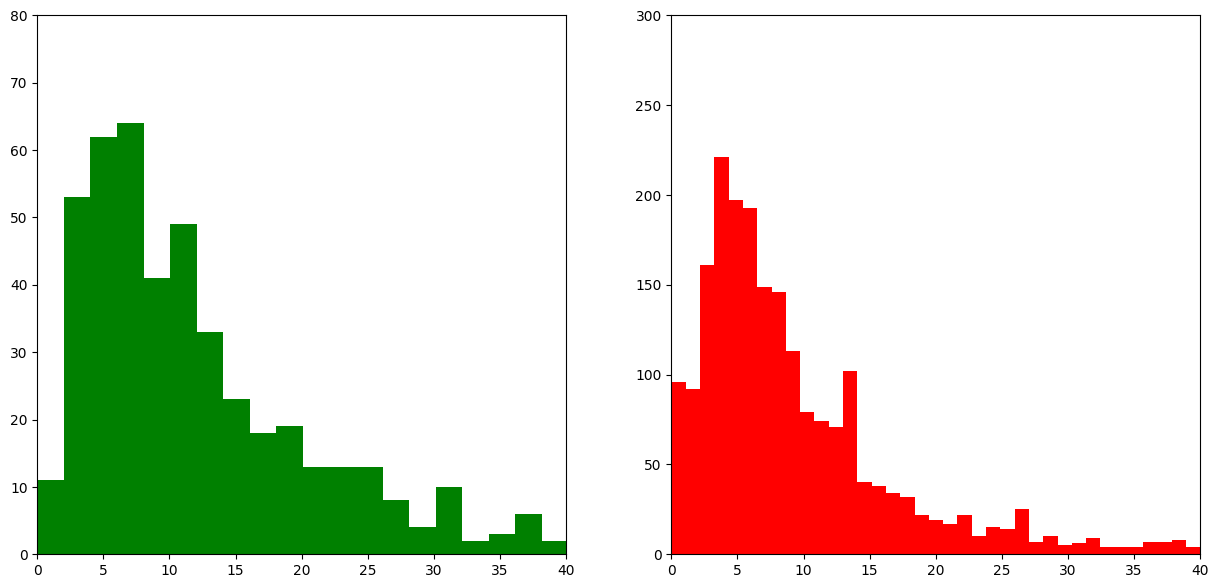

In [246]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plt.hist(gr_02['Turbidity (NTU)'],bins=100,color='green')
plt.axis([0,40,0,80])
plt.subplot(1,2,2)
plt.hist(br_02['Turbidity (NTU)'],bins=400,color='red')
plt.axis([0,40,0,300])
plt.show()

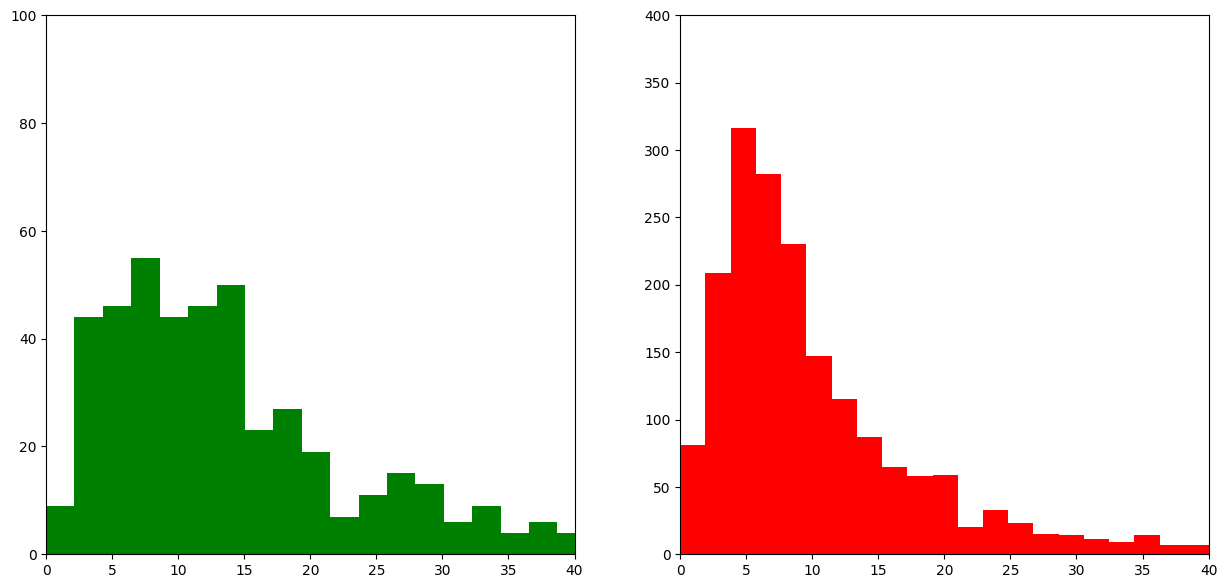

In [247]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plt.hist(gr_2['Turbidity (NTU)'],bins=100,color='green')
plt.axis([0,40,0,100])
plt.subplot(1,2,2)
plt.hist(br_2['Turbidity (NTU)'],bins=400,color='red')
plt.axis([0,40,0,400])
plt.show()

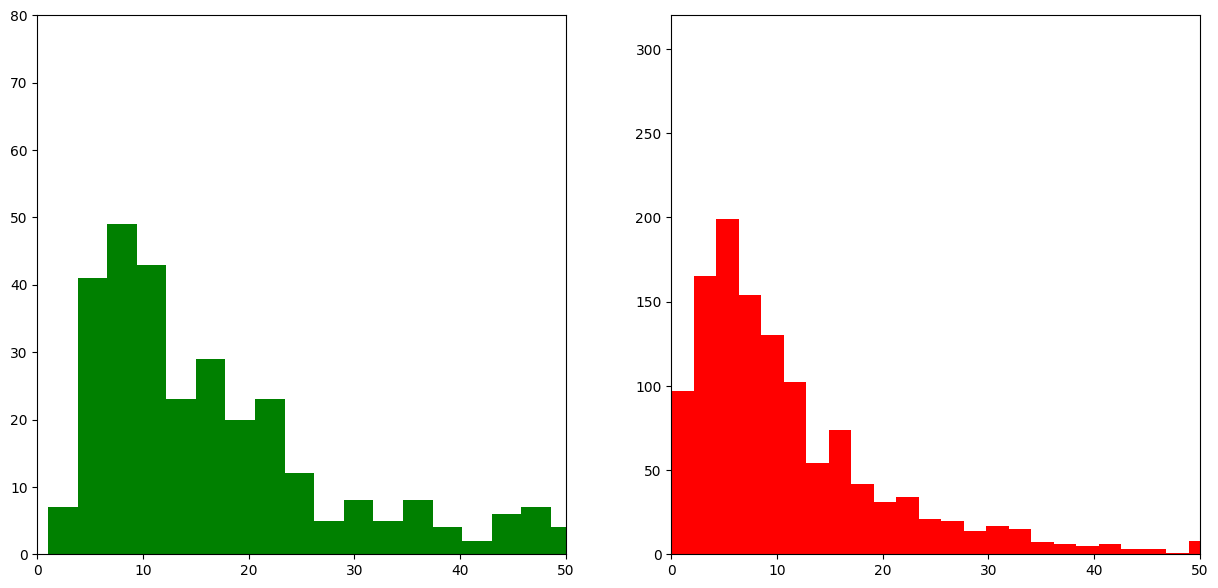

In [248]:
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
plt.hist(gr_4['Turbidity (NTU)'],bins=100,color='green')
plt.axis([0,50,0,80])
plt.subplot(1,2,2)
plt.hist(br_4['Turbidity (NTU)'],bins=240,color='red')
plt.axis([0,50,0,320])
plt.show()